### Analysis of track.csv file - Entire dataset included
##### Random Forest Classifier with Feature Selection
Training Score: 0.9990327529851244
Testing Score: 0.90074044426656

##### Logistic Regression with Feature Selection
Training Data Score: 0.8910346207724634
Testing Data Score: 0.8897338403041825

##### Ask Mortaza am I scaling the data too many times because of whihc the ratings are not good.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#-----------------------#
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.svm import SVR
import warnings 
warnings.filterwarnings('ignore')

In [4]:
#Reading data from csv|| You might need to change this path   
#df_artists_raw=pd.read_csv('D:/DataAnalytics_Class_Activity/Project4_Final/Music-Recommender-UWA/Data/artists.csv')   
#df_tracks_raw=pd.read_csv('D:/DataAnalytics_Class_Activity/Project4_Final/Music-Recommender-UWA/AP/Resources/tracks.csv')    
df_tracks_raw=pd.read_csv('tracks.csv')    
df_tracks_raw

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.127,104.851,3.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.655,102.009,1.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.457,130.418,5.0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.397,169.980,3.0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.196,103.220,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39972,7KhqTPA2HROMOeOlAyPxZo,Coconut Grove - 2003 Remaster,43,161307,0,"[""The Lovin' Spoonful""]",['7CCn4PFRRRZF127jtCBAUe'],1966-11,0.448,0.0729,11,-20.502,0,0.0505,0.965,0.000484,0.0981,0.341,106.583,3.0
39973,4lVZxG2q3fomnIQ5kZ3ifQ,"Hold On, I'm Comin'",4,155707,0,['Sam & Dave'],['2BVYdY4PyfCF9z4NrkhEB2'],2020-03-13,0.803,0.3380,6,-14.029,1,0.0349,0.196,0.038000,0.0970,0.912,106.841,4.0
39974,0rcaoSGw38qRItmDwwpDrw,L'estasi dell'oro,42,202850,0,['Ennio Morricone'],['1nIUhcKHnK6iyumRyoV68C'],1966,0.136,0.4840,0,-12.945,1,0.0505,0.715,0.523000,0.0615,0.102,99.566,4.0
39975,2RvDHSvKghCX03v6w80gBb,Good Lovin',3,200760,0,['Mary Wells'],['1cjZk1xXn3YCToNg3uJpA7'],2020-03-13,0.553,0.5700,5,-9.297,1,0.0618,0.356,0.000000,0.4120,0.699,153.547,4.0


### Pre-processing steps 
#### 1. Remove duplicates and drop the null values.
#### 2. Categorical Data can be converted : Label Encoding or One-Hot Encoding.  
#### 3. Scaling/Normalization: All features to be shifted to similar numeric scales so that the magnitude of one features doesn't
####     bias the model during training.
#### 4.Explore feature selection : 
####    from sklearn.feature_selection import SelectFromModel

In [ ]:
# Filtering data after 2011
#df_tracks=df_tracks_raw.loc[(df_tracks_raw["release_date"]>'2011')]
#df_tracks

# Filtering data after 2000
#df_tracks=df_tracks_raw.loc[(df_tracks_raw["release_date"]>'2000')]

#Select entire dataset
df_tracks=df_tracks_raw

#Dropping Naan Value
df_tracks = df_tracks.dropna()

#Drop Duplicates

In [6]:
# # Visualizing data types and unique values 
# print(df_tracks.columns)
# print(df_tracks.dtypes)
# print(df_tracks["id_artists"].nunique())

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')
id                   object
name                 object
popularity            int64
duration_ms           int64
explicit              int64
artists              object
id_artists           object
release_date         object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature      float64
dtype: object
7786


In [7]:
# #Extracting year from release date column
# pd.to_datetime(df_tracks['release_date']).dt.year

0        1922
1        1922
2        1922
3        1922
4        1922
         ... 
39971    2020
39972    1966
39973    2020
39974    1966
39975    2020
Name: release_date, Length: 39976, dtype: int64

In [8]:
#Clean the dataframe 
#Question : Should we have 'id_artists'--Label encoding,'release_date'--year  column as a features
#from sklearn.preprocessing import LabelEncoder
#encoder = LabelEncoder()
#encoded_categories = encoder.fit_transform(categories)
df_supervised= df_tracks[['popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness','liveness', 'valence', 'tempo', 'time_signature']]
#df_supervised.dtypes

In [9]:
#Adding release year to the df
df_supervised["year"]=pd.to_datetime(df_tracks['release_date']).dt.year
df_supervised

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
0,6,126903,0,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.127,104.851,3.0,1922
1,0,98200,0,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.655,102.009,1.0,1922
2,0,181640,0,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.457,130.418,5.0,1922
3,0,176907,0,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.397,169.980,3.0,1922
4,0,163080,0,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.196,103.220,4.0,1922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39971,4,188360,0,0.388,0.6170,2,-4.614,1,0.0288,0.383,0.000000,0.1260,0.674,76.037,3.0,2020
39972,43,161307,0,0.448,0.0729,11,-20.502,0,0.0505,0.965,0.000484,0.0981,0.341,106.583,3.0,1966
39973,4,155707,0,0.803,0.3380,6,-14.029,1,0.0349,0.196,0.038000,0.0970,0.912,106.841,4.0,2020
39974,42,202850,0,0.136,0.4840,0,-12.945,1,0.0505,0.715,0.523000,0.0615,0.102,99.566,4.0,1966


In [10]:
#Printing unique values
df_supervised["popularity"].unique()

array([ 6,  0,  1,  4, 41, 38, 30, 28, 27, 26, 25, 23, 22, 20, 18, 17, 16,
       15, 14, 11, 10,  8,  9,  5,  7,  2, 39, 33, 32, 24, 21, 19, 13, 12,
        3, 51, 48, 40, 34, 29, 47, 43, 37, 35, 31, 55, 50, 36, 42, 65, 53,
       45, 49, 46, 44, 52, 56, 54, 61, 62, 57, 69, 58, 68, 60, 64, 63, 67,
       66, 59, 74, 71, 77, 70, 79, 75, 73, 72, 80, 78, 76])

In [11]:
# Define a function to map Popularity to popularity_group
def map_popularity(x):
    if x >= 0 and x <= 20:
        return 1 #Bad Songs
    elif x >= 21 and x <= 50:
        return 2 #Popular Songs
    elif x >= 51 and x <= 80:
        return 3 #Very Popular
    else:
        return 4 #Bangers  

In [12]:
# Apply the map_popularity function to each row of the dataframe
df_supervised['popularity_group'] = df_supervised['popularity'].apply(map_popularity)
df_supervised  

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year,popularity_group
0,6,126903,0,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.127,104.851,3.0,1922,1
1,0,98200,0,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.655,102.009,1.0,1922,1
2,0,181640,0,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.457,130.418,5.0,1922,1
3,0,176907,0,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.397,169.980,3.0,1922,1
4,0,163080,0,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.196,103.220,4.0,1922,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39971,4,188360,0,0.388,0.6170,2,-4.614,1,0.0288,0.383,0.000000,0.1260,0.674,76.037,3.0,2020,1
39972,43,161307,0,0.448,0.0729,11,-20.502,0,0.0505,0.965,0.000484,0.0981,0.341,106.583,3.0,1966,2
39973,4,155707,0,0.803,0.3380,6,-14.029,1,0.0349,0.196,0.038000,0.0970,0.912,106.841,4.0,2020,1
39974,42,202850,0,0.136,0.4840,0,-12.945,1,0.0505,0.715,0.523000,0.0615,0.102,99.566,4.0,1966,2


In [13]:
# df_supervised.dtypes

popularity            int64
duration_ms           int64
explicit              int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature      float64
year                  int64
popularity_group      int64
dtype: object

In [14]:
#Datatype conversion | Use loop instead copy Solomons code
df_supervised['danceability'] = df_supervised['danceability'].astype(int)
df_supervised['energy'] = df_supervised['energy'].astype(int)
df_supervised['loudness'] = df_supervised['loudness'].astype(int)
df_supervised['speechiness'] = df_supervised['speechiness'].astype(int)
df_supervised['acousticness'] = df_supervised['acousticness'].astype(int)
df_supervised['instrumentalness'] = df_supervised['instrumentalness'].astype(int)
df_supervised['liveness'] = df_supervised['liveness'].astype(int)
df_supervised['valence'] = df_supervised['valence'].astype(int)
df_supervised['tempo'] = df_supervised['tempo'].astype(int)
df_supervised['speechiness'] = df_supervised['speechiness'].astype(int)
df_supervised.dtypes

popularity            int64
duration_ms           int64
explicit              int64
danceability          int64
energy                int64
key                   int64
loudness              int64
mode                  int64
speechiness           int64
acousticness          int64
instrumentalness      int64
liveness              int64
valence               int64
tempo                 int64
time_signature      float64
year                  int64
popularity_group      int64
dtype: object

In [15]:
#Assigning Target and Featueres 
y = df_supervised["popularity_group"]
X = df_supervised.drop(["popularity","popularity_group"], axis=1)
X

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year
0,126903,0,0,0,0,-13,1,0,0,0,0,0,104,3.0,1922
1,98200,0,0,0,0,-22,1,0,0,0,0,0,102,1.0,1922
2,181640,0,0,0,1,-21,1,0,0,0,0,0,130,5.0,1922
3,176907,0,0,0,7,-27,1,0,0,0,0,0,169,3.0,1922
4,163080,0,0,0,3,-16,0,0,0,0,0,0,103,4.0,1922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39971,188360,0,0,0,2,-4,1,0,0,0,0,0,76,3.0,2020
39972,161307,0,0,0,11,-20,0,0,0,0,0,0,106,3.0,1966
39973,155707,0,0,0,6,-14,1,0,0,0,0,0,106,4.0,2020
39974,202850,0,0,0,0,-12,1,0,0,0,0,0,99,4.0,1966


In [16]:
#Spliting data into Training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
#Scaling,Fit and Transforming Data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
data = [X_train_scaled, X_test_scaled, y_train, y_test]

In [17]:
# RandomForestClassifier without feature selection
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9990327529851244
Testing Score: 0.9003402041224735


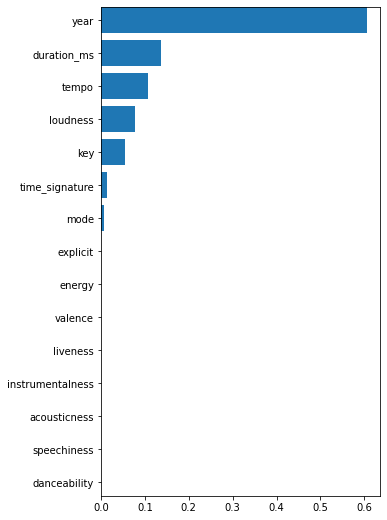

In [18]:
# Knowing about important features
feature_importances = clf.feature_importances_

# Below code plots a visualization displaying feature importance- COOL !
# Use the following code to plot the most important features
features = sorted(zip(X.columns, feature_importances), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]
fig, ax = plt.subplots()
fig.set_size_inches(5,9)
plt.margins(y=0.001)
ax.barh(y=cols, width=width)
plt.show()

#Below bar graph shows the important features

In [19]:
#Defining a blank list, I am not sure if I am using this. During code cleaning and remove
features_list =[""]

In [20]:
#Based on best features create a new date frame 
y = df_supervised["popularity_group"]
X = df_supervised.drop(["popularity","popularity_group","energy","instrumentalness","valence","liveness","acousticness",
                       "speechiness","danceability"], 
                       axis=1)
X

,duration_ms,explicit,key,loudness,mode,tempo,time_signature,year
0,126903,0,0,-13,1,104,3.0,1922
1,98200,0,0,-22,1,102,1.0,1922
2,181640,0,1,-21,1,130,5.0,1922
3,176907,0,7,-27,1,169,3.0,1922
4,163080,0,3,-16,0,103,4.0,1922
...,...,...,...,...,...,...,...,...
39971,188360,0,2,-4,1,76,3.0,2020
39972,161307,0,11,-20,0,106,3.0,1966
39973,155707,0,6,-14,1,106,4.0,2020
39974,202850,0,0,-12,1,99,4.0,1966


In [21]:
#Fit and Trasnform data with new features 
X_selected_train, X_selected_test, y_train, y_test = train_test_split(X, y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)
#data_best_feature = [X_selected_train_scaled, X_selected_test_scaled, y_train, y_test]

In [22]:
#RandomForest Classifier with  features selection
clf = RandomForestClassifier(random_state=42, n_estimators=800).fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Score: 0.9990327529851244
Testing Score: 0.90074044426656


In [23]:
#Logistic Regression with  features selection
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_selected_train_scaled, y_train)
# Print the accuracy score for the test data
print(f"Training Data Score: {classifier.score(X_selected_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_selected_test_scaled, y_test)}")


Training Data Score: 0.8910346207724634
Testing Data Score: 0.8897338403041825
